In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [5]:
supermanbatman = cast[(cast.character == "Superman") | (cast.character == "Batman")]
supermanbatman.head(10)

,title,year,name,type,character,n
972,Batman Fights Dracula,1967,Jing Abalos,actor,Batman,1.0
15483,Batman v Superman: Dawn of Justice,2016,Ben Affleck,actor,Batman,1.0
15509,Justice League,2017,Ben Affleck,actor,Batman,NaN
15511,Justice League Part Two,2019,Ben Affleck,actor,Batman,NaN
15527,Suicide Squad,2016,Ben Affleck,actor,Batman,NaN
44727,Atom Man vs. Superman,1950,Kirk Alyn,actor,Superman,1.0
44735,Corky of Gasoline Alley,1951,Kirk Alyn,actor,Superman,NaN
44757,Superman,1948,Kirk Alyn,actor,Superman,1.0
46286,American Splendor,2003,Chris Ambrose,actor,Superman,1.0
48746,My Amnesia Girl,2010,Manolito Ampon,actor,Superman,45.0


In [6]:
yrgrp = supermanbatman.groupby(["character", "year"]).size()
yrgrp

character  year
Batman     1938    1
           1940    1
           1943    1
           1949    2
           1953    2
           1957    2
           1965    1
           1966    1
           1967    1
           1973    1
           1981    1
           1985    2
           1988    1
           1989    1
           1991    1
           1992    1
           1993    2
           1994    1
           1995    1
           1997    1
           1998    1
           1999    1
           2002    1
           2003    1
           2004    1
           2005    1
           2008    3
           2009    3
           2010    1
           2011    4
                  ..
Superman   1948    1
           1950    1
           1951    2
           1954    5
           1955    1
           1973    2
           1978    2
           1980    2
           1981    1
           1983    2
           1985    2
           1987    1
           1991    1
           1992    1
           1994    1
           1995   

In [7]:
yrgrp2 = yrgrp.unstack(0)
yrgrp2.head()

character,Batman,Superman
year,,
1938,1.0,NaN
1940,1.0,NaN
1943,1.0,NaN
1948,NaN,1.0
1949,2.0,NaN


In [8]:
yrgrp2 = yrgrp2.fillna(0)

In [9]:
supermanyear = yrgrp2[yrgrp2.Superman > yrgrp2.Batman]

In [10]:
supermanyear

character,Batman,Superman
year,,
1948,0.0,1.0
1950,0.0,1.0
1951,0.0,2.0
1954,0.0,5.0
1955,0.0,1.0
1973,1.0,2.0
1978,0.0,2.0
1980,0.0,2.0
1983,0.0,2.0


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [11]:
batmanyear = yrgrp2[yrgrp2.Batman > yrgrp2.Superman]
batmanyear.fillna(' ')

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1949,2.0,0.0
1953,2.0,0.0
1957,2.0,0.0
1965,1.0,0.0
1966,1.0,0.0
1967,1.0,0.0


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [12]:
a = cast.groupby(["type", "year"]).size()
a.head(25)

type   year
actor  1894       2
       1900       2
       1905       1
       1906      14
       1907       5
       1908      29
       1909       3
       1910      44
       1911     135
       1912     242
       1913     657
       1914    2237
       1915    3452
       1916    4883
       1917    5267
       1918    4931
       1919    5028
       1920    5347
       1921    4347
       1922    4491
       1923    4166
       1924    4473
       1925    4771
       1926    4770
       1927    4933
dtype: int64

In [13]:
a.unstack(0).head()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN


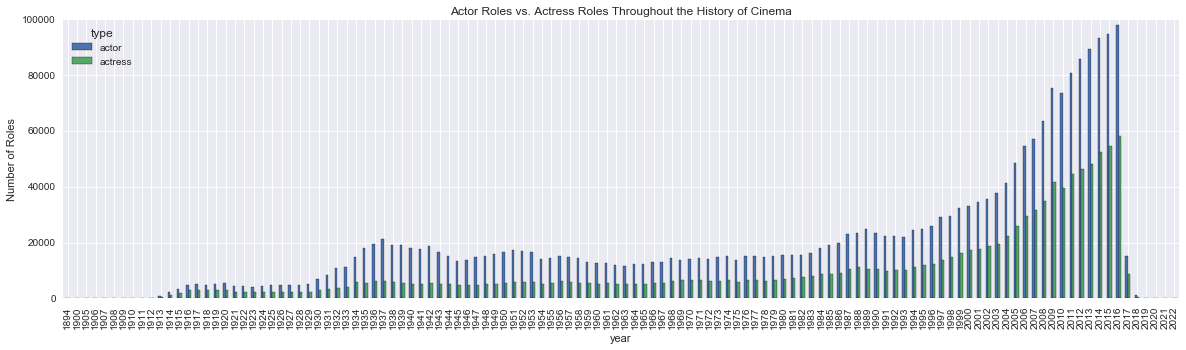

In [14]:
a.unstack(0).fillna(0).plot(kind='bar', figsize = (20,5))
plt.title('Actor Roles vs. Actress Roles Throughout the History of Cinema')
plt.ylabel('Number of Roles')

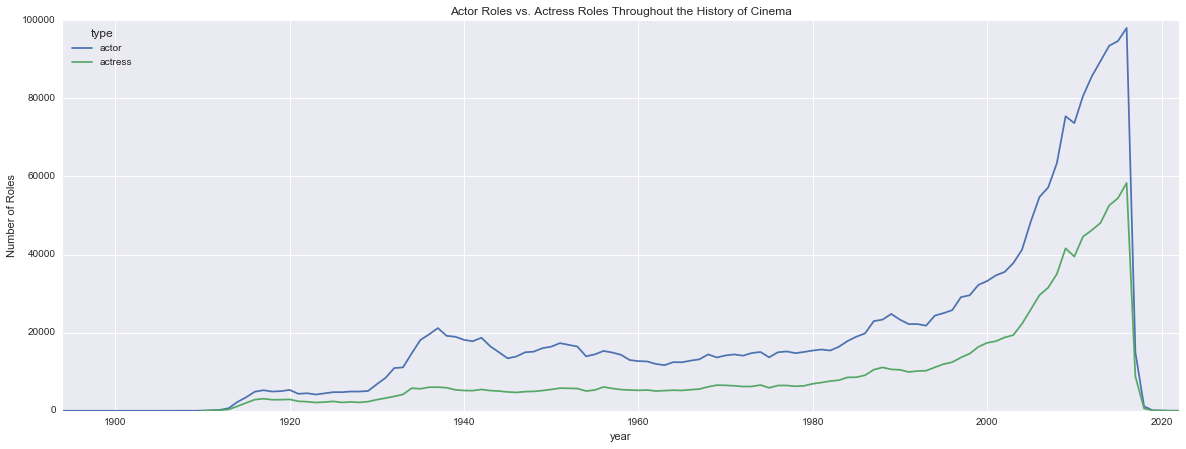

In [15]:
a.unstack(0).plot(kind='line', figsize = (20,7))
plt.title('Actor Roles vs. Actress Roles Throughout the History of Cinema')
plt.ylabel('Number of Roles')

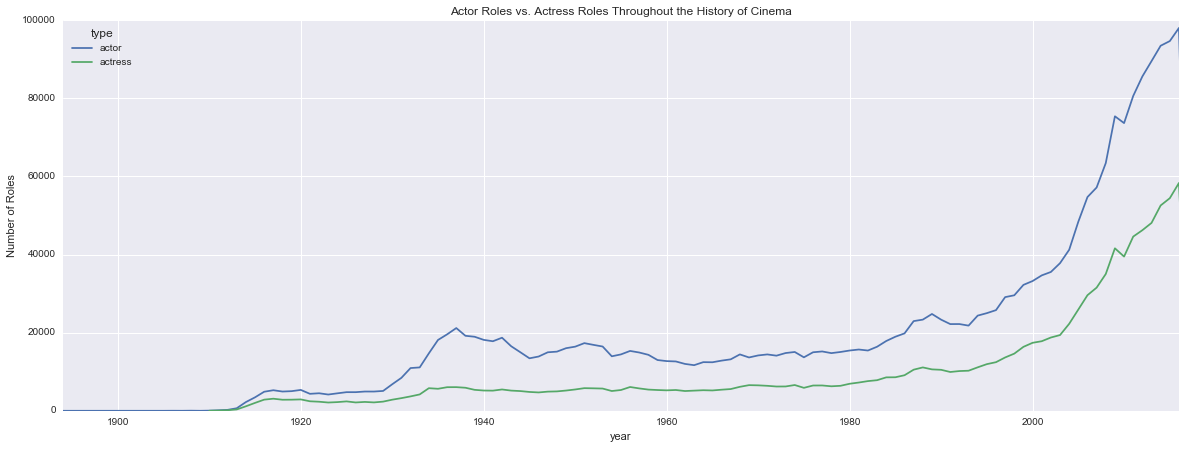

In [16]:
a.unstack(0).plot(kind='line', figsize = (20,7), xlim=[1894, 2016])
plt.title('Actor Roles vs. Actress Roles Throughout the History of Cinema')
plt.ylabel('Number of Roles')

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

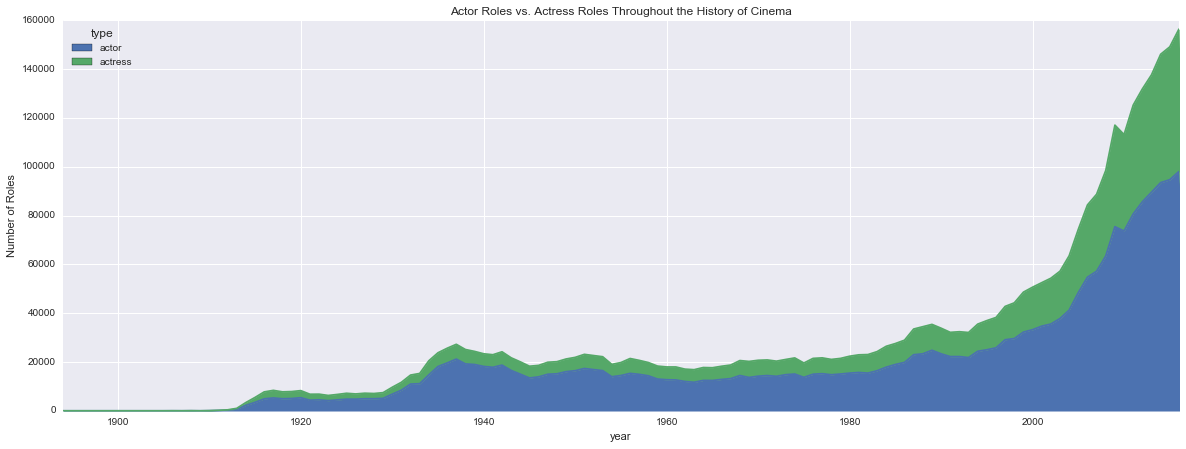

In [17]:
a.unstack(0).plot(kind='area', figsize = (20,7), xlim=[1894, 2016])
plt.title('Actor Roles vs. Actress Roles Throughout the History of Cinema')
plt.ylabel('Number of Roles')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [18]:
a.unstack(0).head()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN


In [19]:
difference = a.unstack(0)["actor"].fillna(0) - a.unstack(0)["actress"].fillna(0)

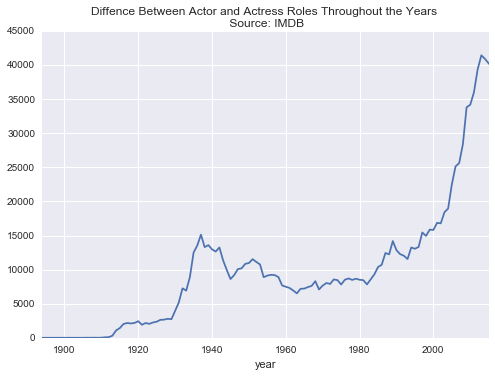

In [20]:
difference.plot(xlim=[1894,2015])
plt.title("Diffence Between Actor and Actress Roles Throughout the Years \n Source: IMDB")

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

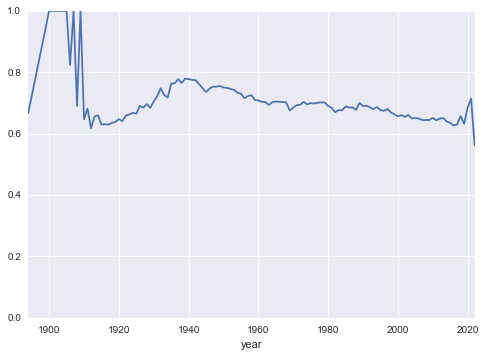

In [21]:
(a.unstack(0)["actor"].fillna(0) / (a.unstack(0)["actor"].fillna(0) + a.unstack(0)["actress"].fillna(0))).plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [22]:
totalactors = cast[cast.type == "actor"]
totalactors.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [23]:
actors2 = totalactors[totalactors.n == 2]
actors2.head()

,title,year,name,type,character,n
93,Big Apple,2002,Angel 11:11,actor,Angel,2.0
117,Asad wa arbaa qutat,2007,4 Cats,actor,Themselves,2.0
243,Suli,2016,Pragathi A.S.,actor,Shabana,2.0
288,Sarrainodu,2016,Aadhi,actor,Vairam Dhanush,2.0
319,Dhoni,2012,Aakash (IV),actor,Karthick Subramaniam,2.0


In [24]:
e = actors2.groupby(['year', 'type']).size().fillna(0)
e.head()

year  type 
1906  actor     2
1907  actor     1
1908  actor     2
1910  actor     2
1911  actor    14
dtype: int64

In [25]:
e.unstack("type")

type,actor
year,
1906,2
1907,1
1908,2
1910,2
1911,14
1912,9
1913,64
1914,171
1915,337


In [26]:
totalactors.groupby(["year", "type"]).size().unstack("type")

type,actor
year,
1894,2
1900,2
1905,1
1906,14
1907,5
1908,29
1909,3
1910,44
1911,135


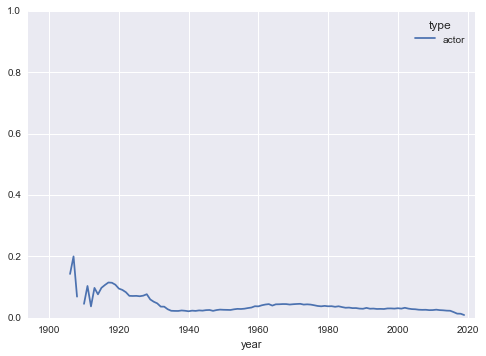

In [27]:
(e.unstack("type").fillna(0) / totalactors.groupby(["year", "type"]).size().unstack("type").fillna(0)).plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [28]:
actors1to3 = totalactors[totalactors.n <= 3]
actors1to3.head()

,title,year,name,type,character,n
93,Big Apple,2002,Angel 11:11,actor,Angel,2.0
98,Live Freaky Die Freaky,2006,Nick 13,actor,TV Reporter #1,1.0
117,Asad wa arbaa qutat,2007,4 Cats,actor,Themselves,2.0
131,All Things Fall Apart,2011,50 Cent,actor,Deon,1.0
132,Caught in the Crossfire,2010,50 Cent,actor,Tino,3.0


In [29]:
actors13grpu = actors1to3.groupby(["year", "n"]).size().unstack("n").fillna(0)
actors13grpu.head()

n,1.0,2.0,3.0
year,,,
1906,2.0,2.0,0.0
1907,1.0,1.0,1.0
1908,1.0,2.0,2.0
1909,1.0,0.0,0.0
1910,1.0,2.0,3.0


In [30]:
actors13grpu.sum()

n
1.0    99325.0
2.0    72696.0
3.0    80273.0
dtype: float64

In [35]:
actors13grpu.sum().sum()

252294.0

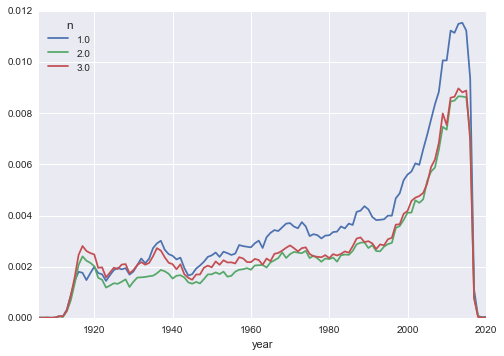

In [36]:
(actors13grpu / actors13grpu.sum().sum()).plot()

Questions are actually pretty vague. :-D